# Job Salary Prediction - Simple Linear Regression

In [1]:
# https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

# Libs

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'/Users/emillypitman/Desktop/kaggle/regression/notebooks'

# Reading file

In [7]:
salario = pd.read_csv("../data/Salary_Data.csv", sep=",")

In [8]:
salario.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
salario.shape

(30, 2)

In [10]:
salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
salario.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Univariate Analysis

<AxesSubplot:xlabel='Salary'>

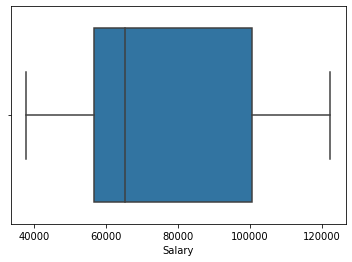

In [12]:
sns.boxplot(salario['Salary'])

<AxesSubplot:xlabel='YearsExperience'>

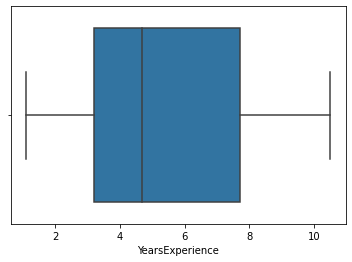

In [13]:
sns.boxplot(salario['YearsExperience'])

## Scatter plot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

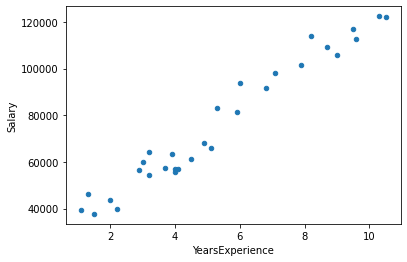

In [14]:
salario.plot.scatter(x="YearsExperience", y="Salary")

## Pearson correlation

In [15]:
salario.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


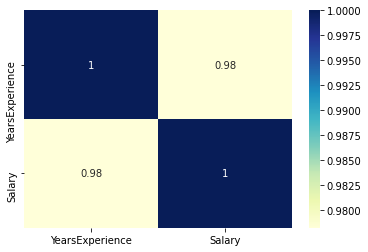

In [16]:
sns.heatmap(salario.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Creating X and y

In [17]:
X = salario.iloc[:, :-1].values
y = salario.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2,
    random_state = 0
)

## Linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [22]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

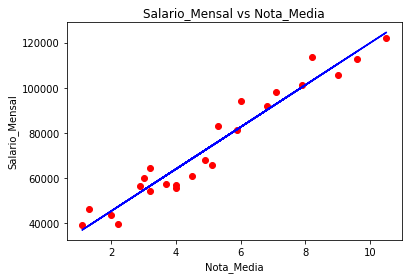

In [24]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train),
        color='blue')
plt.title('Salario_Mensal vs Nota_Media')
plt.xlabel('Nota_Media')
plt.ylabel('Salario_Mensal')
plt.show()

## Visualising the Test set results

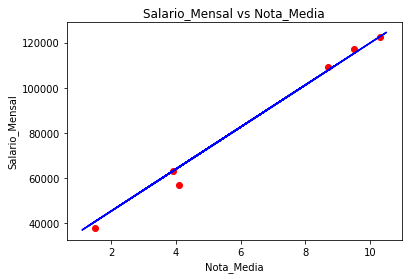

In [25]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train),
        color='blue')
plt.title('Salario_Mensal vs Nota_Media')
plt.xlabel('Nota_Media')
plt.ylabel('Salario_Mensal')
plt.show()

In [30]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.988169515729126

# Using statsmodels

In [27]:
from statsmodels.api import OLS
ols = OLS(
    salario.Salary, sm.add_constant(salario.YearsExperience)
).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        12:37:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
ols.rsquared

0.9569566641435086